STEP 1: DATA EXPLORATION & PREPROCESSING

1.1 Loading Datasets...
✓ Loaded 1500 students
✓ Loaded 150 internships
✓ Total available positions: 459

1.2 Dataset Information

--- Student Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            1500 non-null   object 
 1   name                  1500 non-null   object 
 2   email                 1500 non-null   object 
 3   branch                1500 non-null   object 
 4   year                  1500 non-null   int64  
 5   cgpa                  1500 non-null   float64
 6   technical_skills      1500 non-null   object 
 7   soft_skills           1500 non-null   object 
 8   interests             1500 non-null   object 
 9   location_preferences  1500 non-null   object 
 10  past_projects         1500 non-null   object 
 11  previous_experience   1500 n

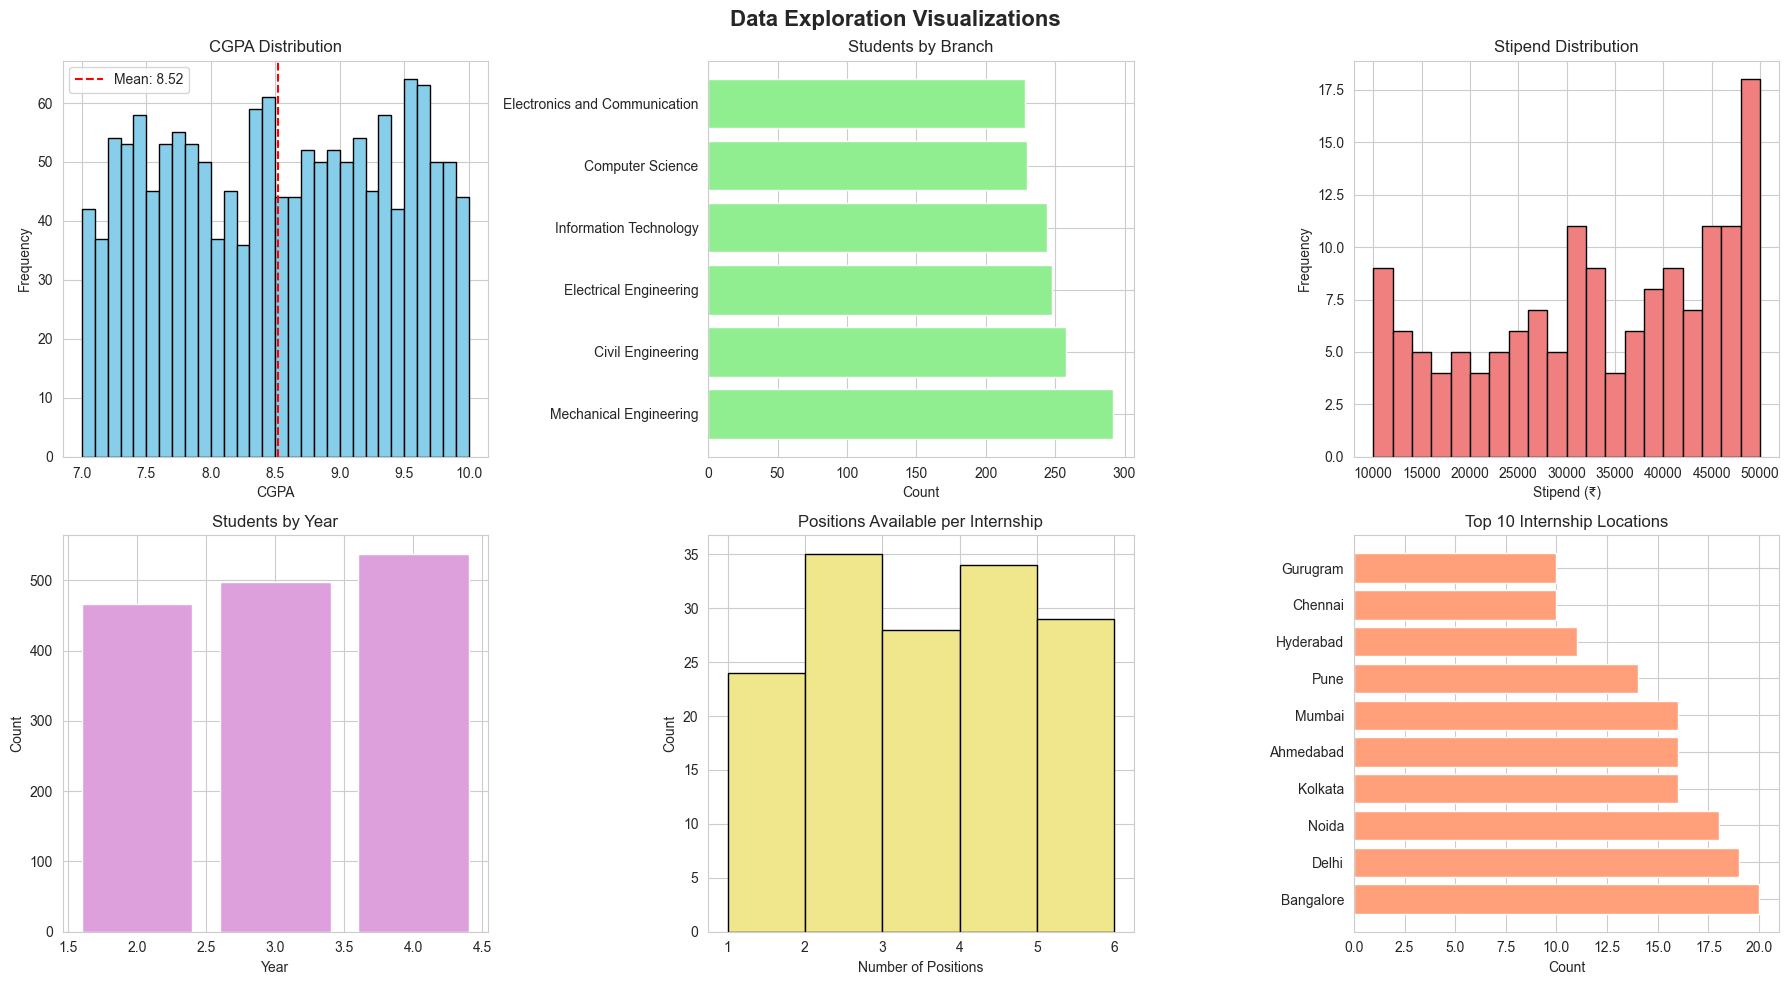


STEP 2: FEATURE ENGINEERING

2.1 Extracting Skills from Students...
✓ Total unique skills across all students: 30

Top 10 Most Common Skills:
  React: 308 students
  Redis: 302 students
  HTML/CSS: 302 students
  Power BI: 293 students
  REST APIs: 293 students
  Machine Learning: 287 students
  Python: 287 students
  Django: 283 students
  Git: 283 students
  Pandas: 282 students

2.2 Building Match Matrix...
This will calculate match scores for all student-internship pairs...
Total combinations to evaluate: 225,000

2.3 Feature Weights Configuration:
  skill_match: 40%
  interest_match: 20%
  cgpa_score: 15%
  location_match: 15%
  branch_match: 5%
  experience_match: 5%

2.4 Calculating Match Scores...
  Processing student 300/1500...
  Processing student 600/1500...
  Processing student 900/1500...
  Processing student 1200/1500...
  Processing student 1500/1500...

✓ Match matrix created with 225,000 combinations
✓ Saved: match_matrix.csv

2.5 Match Score Statistics:
count    225

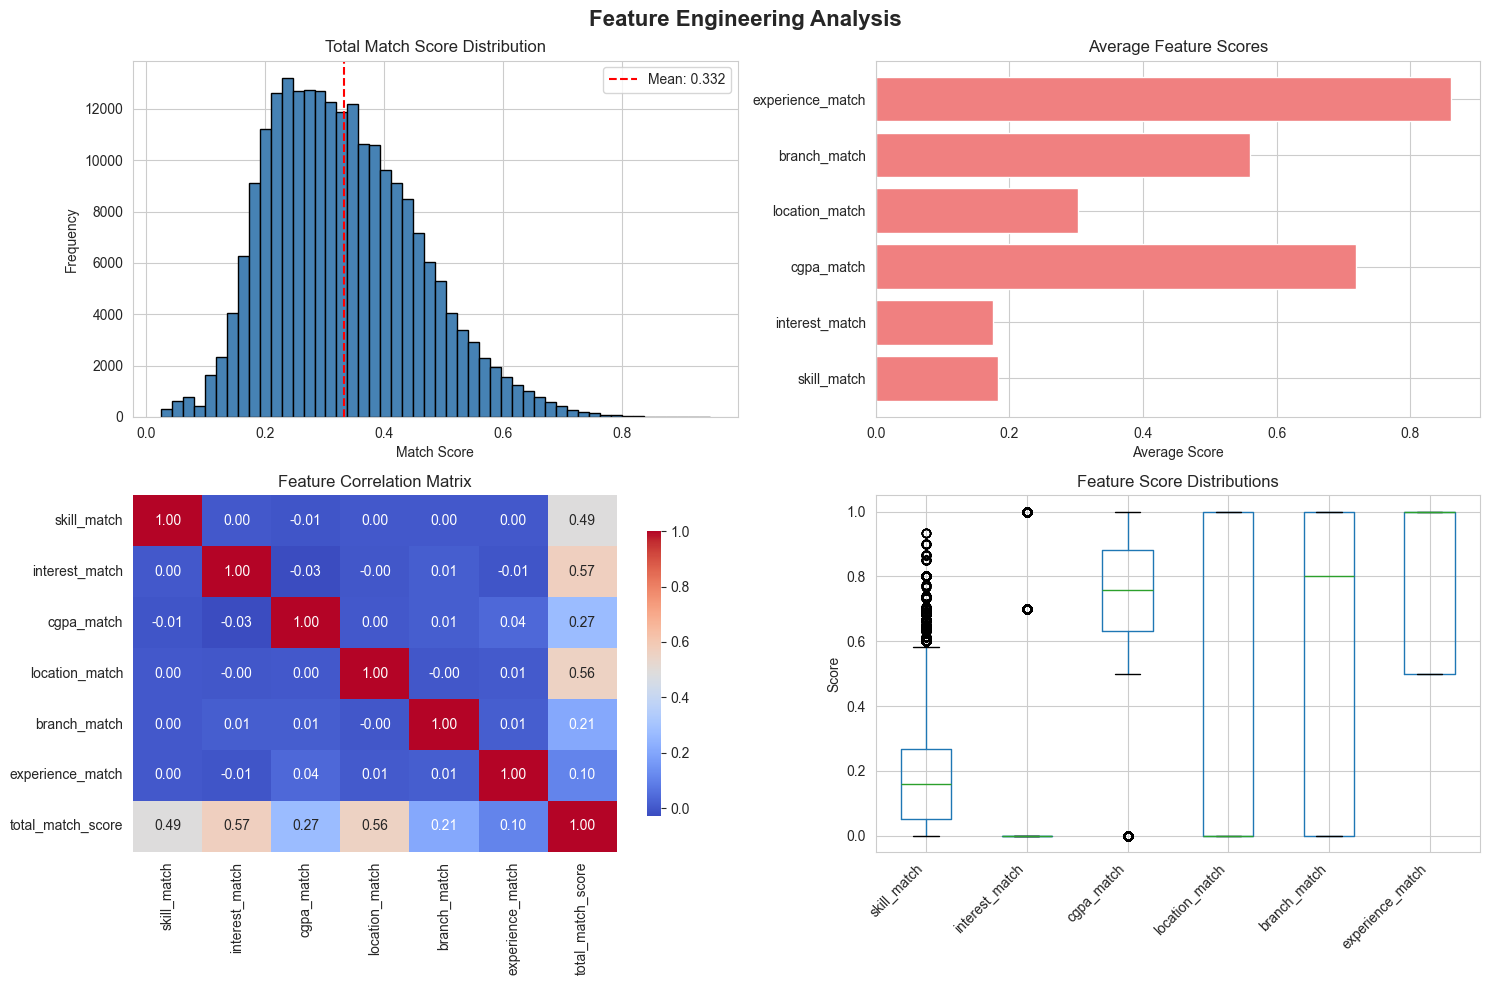

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("STEP 1: DATA EXPLORATION & PREPROCESSING")
print("="*80)

# Load datasets
print("\n1.1 Loading Datasets...")
students_df = pd.read_csv('students_data.csv')
internships_df = pd.read_csv('internships_data.csv')

print(f"✓ Loaded {len(students_df)} students")
print(f"✓ Loaded {len(internships_df)} internships")
print(f"✓ Total available positions: {internships_df['positions_available'].sum()}")

# Basic Information
print("\n1.2 Dataset Information")
print("\n--- Student Dataset ---")
print(students_df.info())
print("\n--- Internship Dataset ---")
print(internships_df.info())

# Check for missing values
print("\n1.3 Missing Values Check")
print("\nStudents Missing Values:")
print(students_df.isnull().sum())
print("\nInternships Missing Values:")
print(internships_df.isnull().sum())

# Statistical Summary
print("\n1.4 Statistical Summary")
print("\n--- Student Statistics ---")
print(students_df.describe())
print("\n--- Internship Statistics ---")
print(internships_df.describe())

# Data Quality Checks
print("\n1.5 Data Quality Checks")
print(f"Duplicate students: {students_df.duplicated().sum()}")
print(f"Duplicate internships: {internships_df.duplicated().sum()}")
print(f"CGPA range: {students_df['cgpa'].min():.2f} - {students_df['cgpa'].max():.2f}")
print(f"Stipend range: ₹{internships_df['stipend'].min()} - ₹{internships_df['stipend'].max()}")

# Distribution Analysis
print("\n1.6 Distribution Analysis")
print("\nBranch Distribution:")
print(students_df['branch'].value_counts())
print("\nYear Distribution:")
print(students_df['year'].value_counts())
print("\nCompany Domain Distribution:")
print(internships_df['domain'].value_counts())
print("\nLocation Distribution:")
print(internships_df['location'].value_counts())

# Visualizations
print("\n1.7 Creating Visualizations...")

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Data Exploration Visualizations', fontsize=16, fontweight='bold')

# 1. CGPA Distribution
axes[0, 0].hist(students_df['cgpa'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('CGPA Distribution')
axes[0, 0].set_xlabel('CGPA')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(students_df['cgpa'].mean(), color='red', linestyle='--', label=f'Mean: {students_df["cgpa"].mean():.2f}')
axes[0, 0].legend()

# 2. Branch Distribution
branch_counts = students_df['branch'].value_counts()
axes[0, 1].barh(branch_counts.index, branch_counts.values, color='lightgreen')
axes[0, 1].set_title('Students by Branch')
axes[0, 1].set_xlabel('Count')

# 3. Stipend Distribution
axes[0, 2].hist(internships_df['stipend'], bins=20, color='lightcoral', edgecolor='black')
axes[0, 2].set_title('Stipend Distribution')
axes[0, 2].set_xlabel('Stipend (₹)')
axes[0, 2].set_ylabel('Frequency')

# 4. Year Distribution
year_counts = students_df['year'].value_counts().sort_index()
axes[1, 0].bar(year_counts.index, year_counts.values, color='plum')
axes[1, 0].set_title('Students by Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Count')

# 5. Positions Available
axes[1, 1].hist(internships_df['positions_available'], bins=range(1, 7), color='khaki', edgecolor='black')
axes[1, 1].set_title('Positions Available per Internship')
axes[1, 1].set_xlabel('Number of Positions')
axes[1, 1].set_ylabel('Count')

# 6. Location Distribution (Top 10)
location_counts = internships_df['location'].value_counts().head(10)
axes[1, 2].barh(location_counts.index, location_counts.values, color='lightsalmon')
axes[1, 2].set_title('Top 10 Internship Locations')
axes[1, 2].set_xlabel('Count')

plt.tight_layout()
plt.savefig('data_exploration.png', dpi=300, bbox_inches='tight')
print("✓ Saved: data_exploration.png")
plt.show()

print("\n" + "="*80)
print("STEP 2: FEATURE ENGINEERING")
print("="*80)

# Helper functions for feature engineering
def parse_skills_list(skills_str):
    """Convert comma-separated skills string to list"""
    if pd.isna(skills_str):
        return []
    return [skill.strip() for skill in str(skills_str).split(',')]

def calculate_skill_match(student_skills, required_skills, preferred_skills=None):
    """Calculate skill match percentage"""
    student_skills_set = set(parse_skills_list(student_skills))
    required_skills_set = set(parse_skills_list(required_skills))
    
    if len(required_skills_set) == 0:
        return 0.0
    
    # Calculate required skills match
    required_match = len(student_skills_set.intersection(required_skills_set)) / len(required_skills_set)
    
    # Calculate preferred skills match (bonus)
    if preferred_skills:
        preferred_skills_set = set(parse_skills_list(preferred_skills))
        if len(preferred_skills_set) > 0:
            preferred_match = len(student_skills_set.intersection(preferred_skills_set)) / len(preferred_skills_set)
            # Weighted combination: 80% required, 20% preferred
            return 0.8 * required_match + 0.2 * preferred_match
    
    return required_match

def calculate_interest_match(student_interests, internship_domain):
    """Calculate interest alignment with domain"""
    student_interests_list = [interest.strip().lower() for interest in parse_skills_list(student_interests)]
    domain_lower = str(internship_domain).lower()
    
    # Direct match
    for interest in student_interests_list:
        if interest in domain_lower or domain_lower in interest:
            return 1.0
    
    # Partial match (similar keywords)
    keyword_matches = {
        'web': ['web development', 'frontend', 'backend', 'full stack'],
        'data': ['data science', 'data analysis', 'machine learning', 'ai'],
        'mobile': ['mobile development', 'android', 'ios'],
        'cloud': ['cloud computing', 'devops', 'aws'],
        'security': ['cybersecurity', 'information security']
    }
    
    for key, related in keyword_matches.items():
        if key in domain_lower:
            for interest in student_interests_list:
                if any(rel in interest for rel in related):
                    return 0.7
    
    return 0.0

def calculate_cgpa_score(student_cgpa, min_cgpa_required):
    """Calculate CGPA eligibility and score"""
    if student_cgpa < min_cgpa_required:
        return 0.0
    
    # Normalize: students above min_cgpa get score based on how much they exceed it
    excess = student_cgpa - min_cgpa_required
    max_possible_excess = 10.0 - min_cgpa_required
    
    if max_possible_excess == 0:
        return 1.0
    
    return min(1.0, 0.5 + (excess / max_possible_excess) * 0.5)

def calculate_location_match(student_locations, internship_location):
    """Calculate location preference match"""
    student_locations_list = [loc.strip() for loc in parse_skills_list(student_locations)]
    
    if internship_location in student_locations_list:
        return 1.0
    
    return 0.0

def calculate_branch_match(student_branch, preferred_branches):
    """Calculate branch relevance"""
    preferred_branches_list = [branch.strip() for branch in parse_skills_list(preferred_branches)]
    
    if student_branch in preferred_branches_list:
        return 1.0
    
    # Partial match for related branches
    cs_related = ['Computer Science', 'Information Technology']
    if student_branch in cs_related and any(branch in cs_related for branch in preferred_branches_list):
        return 0.8
    
    return 0.0

def calculate_experience_match(student_experience, experience_required):
    """Calculate experience match"""
    if experience_required == 'Not Required':
        return 1.0
    
    if student_experience == 'Yes':
        return 1.0
    
    return 0.5  # Partial credit if not required but preferred

print("\n2.1 Extracting Skills from Students...")
# Extract and count unique skills
all_student_skills = []
for skills in students_df['technical_skills']:
    all_student_skills.extend(parse_skills_list(skills))

unique_skills = set(all_student_skills)
print(f"✓ Total unique skills across all students: {len(unique_skills)}")

# Most common skills
from collections import Counter
skill_counts = Counter(all_student_skills)
print("\nTop 10 Most Common Skills:")
for skill, count in skill_counts.most_common(10):
    print(f"  {skill}: {count} students")

print("\n2.2 Building Match Matrix...")
print("This will calculate match scores for all student-internship pairs...")
print(f"Total combinations to evaluate: {len(students_df) * len(internships_df):,}")

# Initialize match matrix
match_matrix = []

# Configure weights for different features
WEIGHTS = {
    'skill_match': 0.40,
    'interest_match': 0.20,
    'cgpa_score': 0.15,
    'location_match': 0.15,
    'branch_match': 0.05,
    'experience_match': 0.05
}

print("\n2.3 Feature Weights Configuration:")
for feature, weight in WEIGHTS.items():
    print(f"  {feature}: {weight*100:.0f}%")

# Calculate match scores for each student-internship pair
print("\n2.4 Calculating Match Scores...")
match_data = []

for idx, student in students_df.iterrows():
    if (idx + 1) % 300 == 0:
        print(f"  Processing student {idx + 1}/{len(students_df)}...")
    
    for _, internship in internships_df.iterrows():
        # Calculate individual feature scores
        skill_score = calculate_skill_match(
            student['technical_skills'], 
            internship['required_skills'],
            internship['preferred_skills']
        )
        
        interest_score = calculate_interest_match(
            student['interests'],
            internship['domain']
        )
        
        cgpa_score = calculate_cgpa_score(
            student['cgpa'],
            internship['min_cgpa']
        )
        
        location_score = calculate_location_match(
            student['location_preferences'],
            internship['location']
        )
        
        branch_score = calculate_branch_match(
            student['branch'],
            internship['preferred_branches']
        )
        
        experience_score = calculate_experience_match(
            student['previous_experience'],
            internship['experience_required']
        )
        
        # Calculate weighted total match score
        total_score = (
            WEIGHTS['skill_match'] * skill_score +
            WEIGHTS['interest_match'] * interest_score +
            WEIGHTS['cgpa_score'] * cgpa_score +
            WEIGHTS['location_match'] * location_score +
            WEIGHTS['branch_match'] * branch_score +
            WEIGHTS['experience_match'] * experience_score
        )
        
        match_data.append({
            'student_id': student['student_id'],
            'student_name': student['name'],
            'internship_id': internship['internship_id'],
            'company_name': internship['company_name'],
            'role': internship['role'],
            'skill_match': skill_score,
            'interest_match': interest_score,
            'cgpa_match': cgpa_score,
            'location_match': location_score,
            'branch_match': branch_score,
            'experience_match': experience_score,
            'total_match_score': total_score
        })

# Create match matrix DataFrame
match_matrix_df = pd.DataFrame(match_data)

print(f"\n✓ Match matrix created with {len(match_matrix_df):,} combinations")

# Save match matrix
match_matrix_df.to_csv('match_matrix.csv', index=False)
print("✓ Saved: match_matrix.csv")

print("\n2.5 Match Score Statistics:")
print(match_matrix_df['total_match_score'].describe())

# Analyze feature contributions
print("\n2.6 Feature Score Analysis:")
feature_cols = ['skill_match', 'interest_match', 'cgpa_match', 'location_match', 'branch_match', 'experience_match']
for col in feature_cols:
    print(f"\n{col}:")
    print(f"  Mean: {match_matrix_df[col].mean():.3f}")
    print(f"  Std: {match_matrix_df[col].std():.3f}")
    print(f"  Zero scores: {(match_matrix_df[col] == 0).sum()} ({(match_matrix_df[col] == 0).sum() / len(match_matrix_df) * 100:.1f}%)")

# Show top matches for sample students
print("\n2.7 Sample Top Matches:")
for student_id in students_df['student_id'].head(3):
    student_matches = match_matrix_df[match_matrix_df['student_id'] == student_id].nlargest(5, 'total_match_score')
    print(f"\nTop 5 matches for {student_id}:")
    print(student_matches[['company_name', 'role', 'total_match_score']].to_string(index=False))

# Visualize match score distribution
print("\n2.8 Creating Match Score Visualizations...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Engineering Analysis', fontsize=16, fontweight='bold')

# Total match score distribution
axes[0, 0].hist(match_matrix_df['total_match_score'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Total Match Score Distribution')
axes[0, 0].set_xlabel('Match Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(match_matrix_df['total_match_score'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {match_matrix_df["total_match_score"].mean():.3f}')
axes[0, 0].legend()

# Feature contributions
feature_means = match_matrix_df[feature_cols].mean()
axes[0, 1].barh(feature_cols, feature_means, color='lightcoral')
axes[0, 1].set_title('Average Feature Scores')
axes[0, 1].set_xlabel('Average Score')

# Correlation heatmap of features
corr = match_matrix_df[feature_cols + ['total_match_score']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 0], cbar_kws={'shrink': 0.8})
axes[1, 0].set_title('Feature Correlation Matrix')

# Score distribution by feature
match_matrix_df[feature_cols].boxplot(ax=axes[1, 1])
axes[1, 1].set_title('Feature Score Distributions')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('feature_engineering_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: feature_engineering_analysis.png")
plt.show()



STEP 3: GREEDY ALLOCATION ALGORITHM

3.1 Loading Data...
✓ Loaded 1500 students
✓ Loaded 150 internships
✓ Loaded 225,000 match combinations
✓ Total available positions: 459
✓ Students to positions ratio: 1500 : 459

3.2 Setting Eligibility Criteria...
Minimum match score threshold: 0.3
✓ Eligible matches after filtering: 125,689 (55.9%)

3.3 Sorting Matches by Score...
✓ Matches sorted in descending order
Highest match score: 0.9483
Lowest eligible score: 0.3000

3.4 Initializing Allocation Tracking...
✓ Tracking initialized for 150 internships

3.5 Running Greedy Allocation Algorithm...
Allocating students to internships (highest match scores first)...
  Processed 10,000/125,689 matches... (411 allocated)

✓ All 459 positions filled!

✓ Allocation complete: 459 students allocated

3.6 Creating Allocation Results...
✓ Allocated students: 459
✓ Unallocated students: 1041

3.7 Validating Allocation Constraints...
✓ Duplicate student allocations: 0

✓ Checking capacity constraints...
✓ A

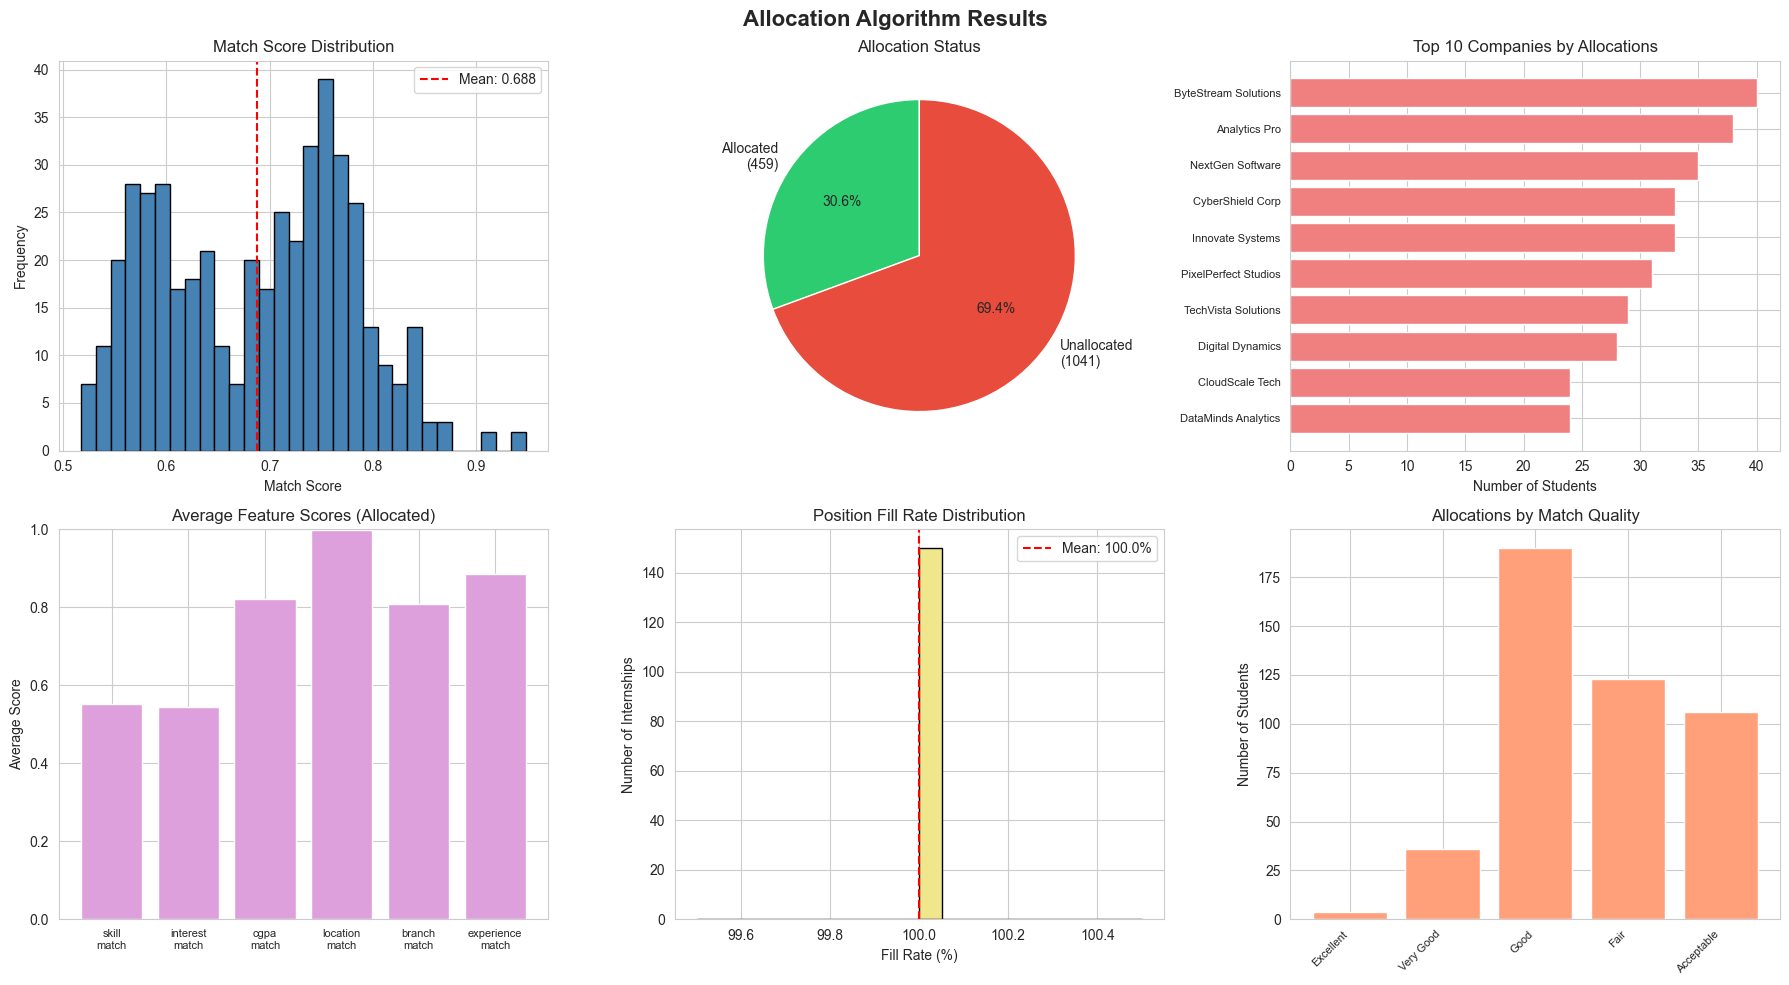


3.11 Generating Summary Report...

INTERNSHIP ALLOCATION SYSTEM - FINAL REPORT
Generated on: 2025-11-30 09:19:08

ALLOCATION SUMMARY
Total Students:                 1500
Total Internships:              150
Total Positions Available:      459
Students Allocated:             459
Students Unallocated:           1041
Allocation Rate:                30.60%
Position Fill Rate:             100.00%

MATCH QUALITY METRICS
Average Match Score:            0.6878
Median Match Score:             0.7009
Standard Deviation:             0.0917
Minimum Match Score:            0.5171
Maximum Match Score:            0.9483

FEATURE CONTRIBUTIONS (Average)
Skill Match:                    0.5533
Interest Match:                 0.5440
CGPA Match:                     0.8224
Location Match:                 0.9978
Branch Match:                   0.8074
Experience Match:               0.8856

ALGORITHM DETAILS
Algorithm Used:                 Greedy Algorithm
Minimum Match Threshold:        0.3
Eligible Matches

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("STEP 3: GREEDY ALLOCATION ALGORITHM")
print("="*80)

# Load required data
print("\n3.1 Loading Data...")
students_df = pd.read_csv('students_data.csv')
internships_df = pd.read_csv('internships_data.csv')
match_matrix_df = pd.read_csv('match_matrix.csv')

print(f"✓ Loaded {len(students_df)} students")
print(f"✓ Loaded {len(internships_df)} internships")
print(f"✓ Loaded {len(match_matrix_df):,} match combinations")

# Calculate total available positions
total_positions = internships_df['positions_available'].sum()
print(f"✓ Total available positions: {total_positions}")
print(f"✓ Students to positions ratio: {len(students_df)} : {total_positions}")

# Step 3.2: Set Eligibility Threshold
print("\n3.2 Setting Eligibility Criteria...")
MIN_MATCH_SCORE = 0.30  # Minimum 30% match score required
print(f"Minimum match score threshold: {MIN_MATCH_SCORE}")

# Filter eligible matches
eligible_matches = match_matrix_df[match_matrix_df['total_match_score'] >= MIN_MATCH_SCORE].copy()
print(f"✓ Eligible matches after filtering: {len(eligible_matches):,} ({len(eligible_matches)/len(match_matrix_df)*100:.1f}%)")

# Step 3.3: Sort matches by score (Greedy approach - highest score first)
print("\n3.3 Sorting Matches by Score...")
eligible_matches = eligible_matches.sort_values('total_match_score', ascending=False).reset_index(drop=True)
print(f"✓ Matches sorted in descending order")
print(f"Highest match score: {eligible_matches['total_match_score'].iloc[0]:.4f}")
print(f"Lowest eligible score: {eligible_matches['total_match_score'].iloc[-1]:.4f}")

# Step 3.4: Initialize Tracking Structures
print("\n3.4 Initializing Allocation Tracking...")

# Track allocated students
allocated_students = set()

# Track remaining positions for each internship
remaining_positions = {}
for _, internship in internships_df.iterrows():
    remaining_positions[internship['internship_id']] = internship['positions_available']

# Store allocations
allocations = []

print(f"✓ Tracking initialized for {len(remaining_positions)} internships")

# Step 3.5: Run Greedy Allocation Algorithm
print("\n3.5 Running Greedy Allocation Algorithm...")
print("Allocating students to internships (highest match scores first)...")

allocation_count = 0
for idx, match in eligible_matches.iterrows():
    student_id = match['student_id']
    internship_id = match['internship_id']
    
    # Progress indicator
    if (idx + 1) % 10000 == 0:
        print(f"  Processed {idx + 1:,}/{len(eligible_matches):,} matches... ({allocation_count} allocated)")
    
    # Check if student is already allocated
    if student_id in allocated_students:
        continue
    
    # Check if internship has positions available
    if remaining_positions.get(internship_id, 0) <= 0:
        continue
    
    # Allocate this match
    allocations.append({
        'student_id': match['student_id'],
        'student_name': match['student_name'],
        'internship_id': match['internship_id'],
        'company_name': match['company_name'],
        'role': match['role'],
        'match_score': match['total_match_score'],
        'skill_match': match['skill_match'],
        'interest_match': match['interest_match'],
        'cgpa_match': match['cgpa_match'],
        'location_match': match['location_match'],
        'branch_match': match['branch_match'],
        'experience_match': match['experience_match']
    })
    
    # Update tracking
    allocated_students.add(student_id)
    remaining_positions[internship_id] -= 1
    allocation_count += 1
    
    # Stop if all positions are filled
    if allocation_count >= total_positions:
        print(f"\n✓ All {total_positions} positions filled!")
        break
    
    # Stop if all students are allocated
    if len(allocated_students) >= len(students_df):
        print(f"\n✓ All students allocated!")
        break

print(f"\n✓ Allocation complete: {allocation_count} students allocated")

# Step 3.6: Create Allocation DataFrame
print("\n3.6 Creating Allocation Results...")
allocations_df = pd.DataFrame(allocations)

# Get unallocated students
unallocated_students = students_df[~students_df['student_id'].isin(allocated_students)].copy()

print(f"✓ Allocated students: {len(allocations_df)}")
print(f"✓ Unallocated students: {len(unallocated_students)}")

# Step 3.7: Validate Constraints
print("\n3.7 Validating Allocation Constraints...")

# Check 1: No duplicate student allocations
duplicate_check = allocations_df['student_id'].duplicated().sum()
print(f"✓ Duplicate student allocations: {duplicate_check}")
assert duplicate_check == 0, "ERROR: Some students have multiple allocations!"

# Check 2: Verify capacity constraints
print("\n✓ Checking capacity constraints...")
allocated_per_internship = allocations_df.groupby('internship_id').size()
capacity_violations = 0

for internship_id, allocated_count in allocated_per_internship.items():
    original_capacity = internships_df[internships_df['internship_id'] == internship_id]['positions_available'].iloc[0]
    if allocated_count > original_capacity:
        capacity_violations += 1
        print(f"  WARNING: {internship_id} exceeded capacity ({allocated_count} > {original_capacity})")

if capacity_violations == 0:
    print("✓ All capacity constraints satisfied!")

# Check 3: Verify minimum score threshold
below_threshold = allocations_df[allocations_df['match_score'] < MIN_MATCH_SCORE]
print(f"✓ Allocations below threshold: {len(below_threshold)}")

print("\n✓ All constraints validated successfully!")

# Step 3.8: Calculate Statistics
print("\n" + "="*80)
print("ALLOCATION STATISTICS")
print("="*80)

print(f"\n📊 Overall Statistics:")
print(f"  Total Students: {len(students_df)}")
print(f"  Total Internships: {len(internships_df)}")
print(f"  Total Positions Available: {total_positions}")
print(f"  Students Allocated: {len(allocations_df)}")
print(f"  Students Unallocated: {len(unallocated_students)}")
print(f"  Allocation Rate: {len(allocations_df)/len(students_df)*100:.2f}%")
print(f"  Position Fill Rate: {len(allocations_df)/total_positions*100:.2f}%")

print(f"\n📈 Match Score Statistics:")
print(f"  Average Match Score: {allocations_df['match_score'].mean():.4f}")
print(f"  Median Match Score: {allocations_df['match_score'].median():.4f}")
print(f"  Min Match Score: {allocations_df['match_score'].min():.4f}")
print(f"  Max Match Score: {allocations_df['match_score'].max():.4f}")
print(f"  Std Deviation: {allocations_df['match_score'].std():.4f}")

print(f"\n🏢 Internship Statistics:")
internships_filled = allocated_per_internship.count()
print(f"  Internships with allocations: {internships_filled}/{len(internships_df)}")
print(f"  Internships with no allocations: {len(internships_df) - internships_filled}")
print(f"  Average students per internship: {allocated_per_internship.mean():.2f}")

print(f"\n🎯 Feature Score Averages:")
feature_cols = ['skill_match', 'interest_match', 'cgpa_match', 'location_match', 'branch_match', 'experience_match']
for col in feature_cols:
    print(f"  {col}: {allocations_df[col].mean():.4f}")

# Top companies by allocations
print(f"\n🏆 Top 10 Companies by Allocations:")
top_companies = allocations_df['company_name'].value_counts().head(10)
for company, count in top_companies.items():
    print(f"  {company}: {count} students")

# Match score distribution
print(f"\n📊 Match Score Distribution:")
score_ranges = [
    (0.9, 1.0, "Excellent (0.90-1.00)"),
    (0.8, 0.9, "Very Good (0.80-0.89)"),
    (0.7, 0.8, "Good (0.70-0.79)"),
    (0.6, 0.7, "Fair (0.60-0.69)"),
    (0.0, 0.6, "Acceptable (0.00-0.59)")
]

for min_score, max_score, label in score_ranges:
    count = len(allocations_df[(allocations_df['match_score'] >= min_score) & (allocations_df['match_score'] < max_score)])
    percentage = count / len(allocations_df) * 100 if len(allocations_df) > 0 else 0
    print(f"  {label}: {count} ({percentage:.1f}%)")

# Step 3.9: Save Results
print("\n" + "="*80)
print("SAVING RESULTS")
print("="*80)

# Save allocations
allocations_df.to_csv('final_allocations.csv', index=False)
print("✓ Saved: final_allocations.csv")

# Save unallocated students
unallocated_students.to_csv('unallocated_students.csv', index=False)
print("✓ Saved: unallocated_students.csv")

# Create detailed report for internships
internship_report = []
for _, internship in internships_df.iterrows():
    internship_id = internship['internship_id']
    allocated = allocations_df[allocations_df['internship_id'] == internship_id]
    
    internship_report.append({
        'internship_id': internship_id,
        'company_name': internship['company_name'],
        'role': internship['role'],
        'location': internship['location'],
        'positions_available': internship['positions_available'],
        'positions_filled': len(allocated),
        'positions_remaining': internship['positions_available'] - len(allocated),
        'avg_match_score': allocated['match_score'].mean() if len(allocated) > 0 else 0,
        'avg_cgpa': students_df[students_df['student_id'].isin(allocated['student_id'])]['cgpa'].mean() if len(allocated) > 0 else 0
    })

internship_report_df = pd.DataFrame(internship_report)
internship_report_df.to_csv('internship_allocation_report.csv', index=False)
print("✓ Saved: internship_allocation_report.csv")

# Step 3.10: Create Visualizations
print("\n3.10 Creating Visualization Reports...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Allocation Algorithm Results', fontsize=16, fontweight='bold')

# 1. Match Score Distribution
axes[0, 0].hist(allocations_df['match_score'], bins=30, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Match Score Distribution')
axes[0, 0].set_xlabel('Match Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(allocations_df['match_score'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {allocations_df["match_score"].mean():.3f}')
axes[0, 0].legend()

# 2. Allocation Status
status_data = [len(allocations_df), len(unallocated_students)]
status_labels = [f'Allocated\n({len(allocations_df)})', f'Unallocated\n({len(unallocated_students)})']
colors = ['#2ecc71', '#e74c3c']
axes[0, 1].pie(status_data, labels=status_labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 1].set_title('Allocation Status')

# 3. Top 10 Companies
top_10_companies = allocations_df['company_name'].value_counts().head(10)
axes[0, 2].barh(range(len(top_10_companies)), top_10_companies.values, color='lightcoral')
axes[0, 2].set_yticks(range(len(top_10_companies)))
axes[0, 2].set_yticklabels(top_10_companies.index, fontsize=8)
axes[0, 2].set_title('Top 10 Companies by Allocations')
axes[0, 2].set_xlabel('Number of Students')
axes[0, 2].invert_yaxis()

# 4. Feature Contribution to Allocated Matches
feature_means = allocations_df[feature_cols].mean()
axes[1, 0].bar(range(len(feature_cols)), feature_means.values, color='plum')
axes[1, 0].set_xticks(range(len(feature_cols)))
axes[1, 0].set_xticklabels([col.replace('_', '\n') for col in feature_cols], fontsize=8)
axes[1, 0].set_title('Average Feature Scores (Allocated)')
axes[1, 0].set_ylabel('Average Score')
axes[1, 0].set_ylim(0, 1)

# 5. Position Fill Rate per Internship
fill_rates = (internship_report_df['positions_filled'] / internship_report_df['positions_available'] * 100)
axes[1, 1].hist(fill_rates, bins=20, color='khaki', edgecolor='black')
axes[1, 1].set_title('Position Fill Rate Distribution')
axes[1, 1].set_xlabel('Fill Rate (%)')
axes[1, 1].set_ylabel('Number of Internships')
axes[1, 1].axvline(fill_rates.mean(), color='red', linestyle='--', label=f'Mean: {fill_rates.mean():.1f}%')
axes[1, 1].legend()

# 6. Match Score by Score Range
score_range_counts = []
score_range_labels = []
for min_score, max_score, label in score_ranges:
    count = len(allocations_df[(allocations_df['match_score'] >= min_score) & (allocations_df['match_score'] < max_score)])
    score_range_counts.append(count)
    score_range_labels.append(label.split('(')[0].strip())

axes[1, 2].bar(range(len(score_range_labels)), score_range_counts, color='lightsalmon')
axes[1, 2].set_xticks(range(len(score_range_labels)))
axes[1, 2].set_xticklabels(score_range_labels, fontsize=8, rotation=45, ha='right')
axes[1, 2].set_title('Allocations by Match Quality')
axes[1, 2].set_ylabel('Number of Students')

plt.tight_layout()
plt.savefig('allocation_results.png', dpi=300, bbox_inches='tight')
print("✓ Saved: allocation_results.png")
plt.show()

# Generate text summary report
print("\n3.11 Generating Summary Report...")
report_text = f"""
{'='*80}
INTERNSHIP ALLOCATION SYSTEM - FINAL REPORT
{'='*80}
Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

ALLOCATION SUMMARY
{'='*80}
Total Students:                 {len(students_df)}
Total Internships:              {len(internships_df)}
Total Positions Available:      {total_positions}
Students Allocated:             {len(allocations_df)}
Students Unallocated:           {len(unallocated_students)}
Allocation Rate:                {len(allocations_df)/len(students_df)*100:.2f}%
Position Fill Rate:             {len(allocations_df)/total_positions*100:.2f}%

MATCH QUALITY METRICS
{'='*80}
Average Match Score:            {allocations_df['match_score'].mean():.4f}
Median Match Score:             {allocations_df['match_score'].median():.4f}
Standard Deviation:             {allocations_df['match_score'].std():.4f}
Minimum Match Score:            {allocations_df['match_score'].min():.4f}
Maximum Match Score:            {allocations_df['match_score'].max():.4f}

FEATURE CONTRIBUTIONS (Average)
{'='*80}
Skill Match:                    {allocations_df['skill_match'].mean():.4f}
Interest Match:                 {allocations_df['interest_match'].mean():.4f}
CGPA Match:                     {allocations_df['cgpa_match'].mean():.4f}
Location Match:                 {allocations_df['location_match'].mean():.4f}
Branch Match:                   {allocations_df['branch_match'].mean():.4f}
Experience Match:               {allocations_df['experience_match'].mean():.4f}

ALGORITHM DETAILS
{'='*80}
Algorithm Used:                 Greedy Algorithm
Minimum Match Threshold:        {MIN_MATCH_SCORE}
Eligible Matches Evaluated:     {len(eligible_matches):,}
Total Allocations Made:         {len(allocations_df)}

OUTPUT FILES GENERATED
{'='*80}
1. final_allocations.csv        - Complete allocation results
2. unallocated_students.csv     - Students who didn't get allocated
3. internship_allocation_report.csv - Internship-wise report
4. allocation_results.png       - Visualization charts

{'='*80}
END OF REPORT
{'='*80}
"""

with open('allocation_summary_report.txt', 'w') as f:
    f.write(report_text)

print(report_text)
print("✓ Saved: allocation_summary_report.txt")

print("\n" + "="*80)
print("ALLOCATION ALGORITHM COMPLETE!")
print("="*80)
print("\nAll files have been generated successfully.")
print("You can now proceed to build the web interface or analyze the results further.")
print("="*80)